# Load data and functions

For this additional tutorial, we use the processed population scale scRNA-seq data by *Jerber et al. 2021, Nature Genetics*. We let the D52 (treated) cells as the target dataset and the other groups of cells as the candidate background dataset. We recommend to replace the directory name '/storage10/kwangmoon/BasCoD/' with the name of the directory, where the BasCoD was installed.

This tutorial will reproduce Fig.2b and Fig3d of the Manuscript.

In [1]:
source('/storage10/kwangmoon/BasCoD/Rcodes/functions/BasCoD.R')
setwd('/storage10/kwangmoon/BasCoD/data')
library(dplyr)
target=readRDS("Jerber_D52_trt.rds")
background=readRDS("Jerber_others.rds")
DE=readRDS("Jerber_DE_target.rds")


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Gene sets across data

In [2]:
g_target=colnames(target)
g_background=lapply(background,function(b)colnames(b))
data_name=names(background)

# Visual representation of DR and CDR results

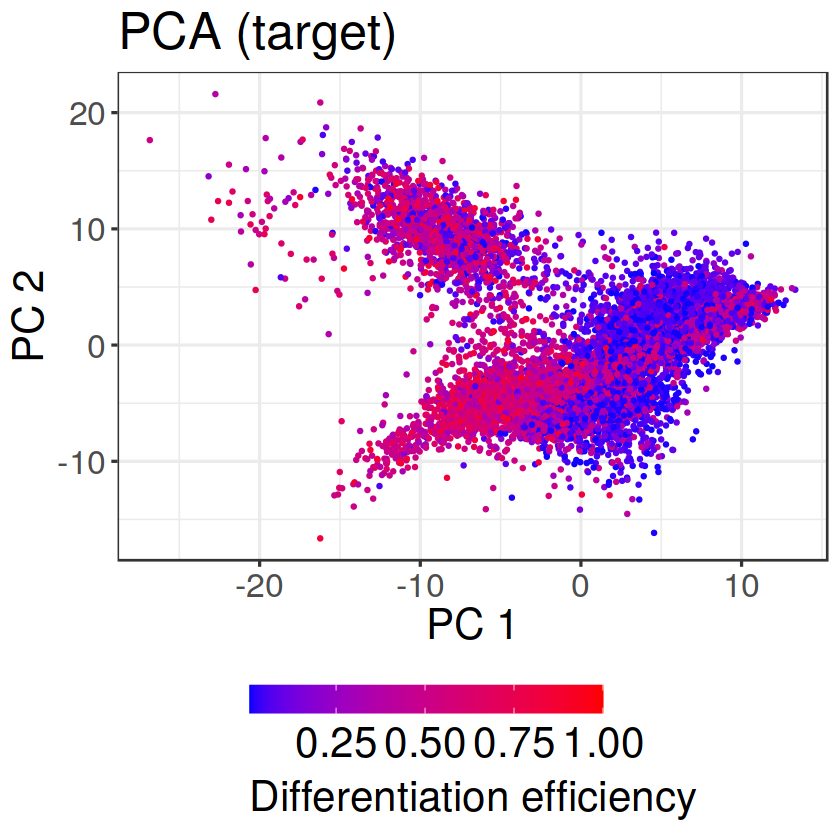

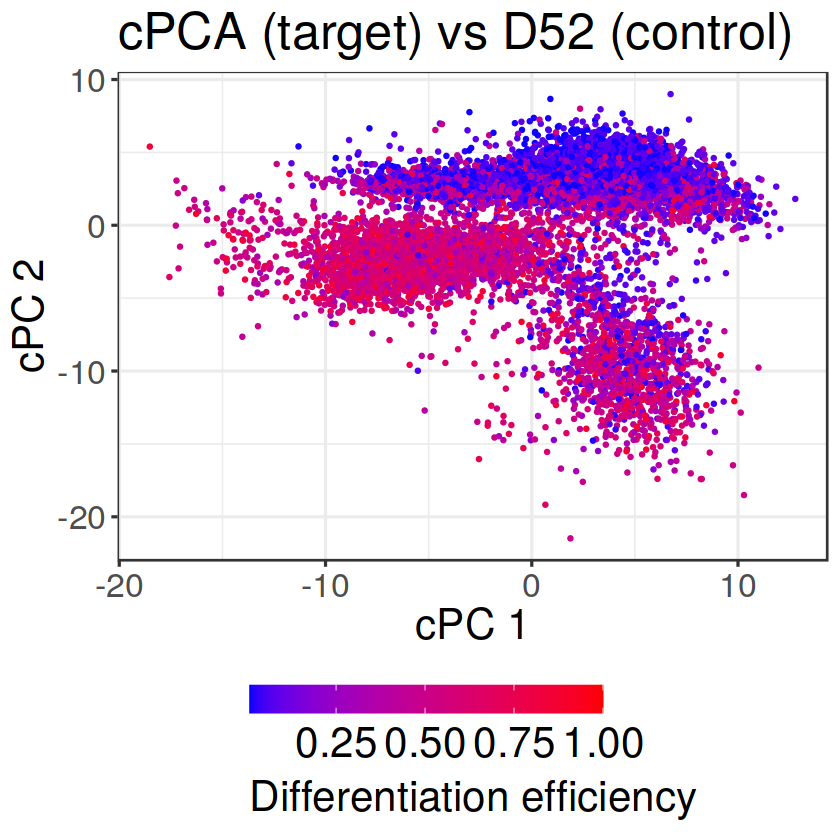

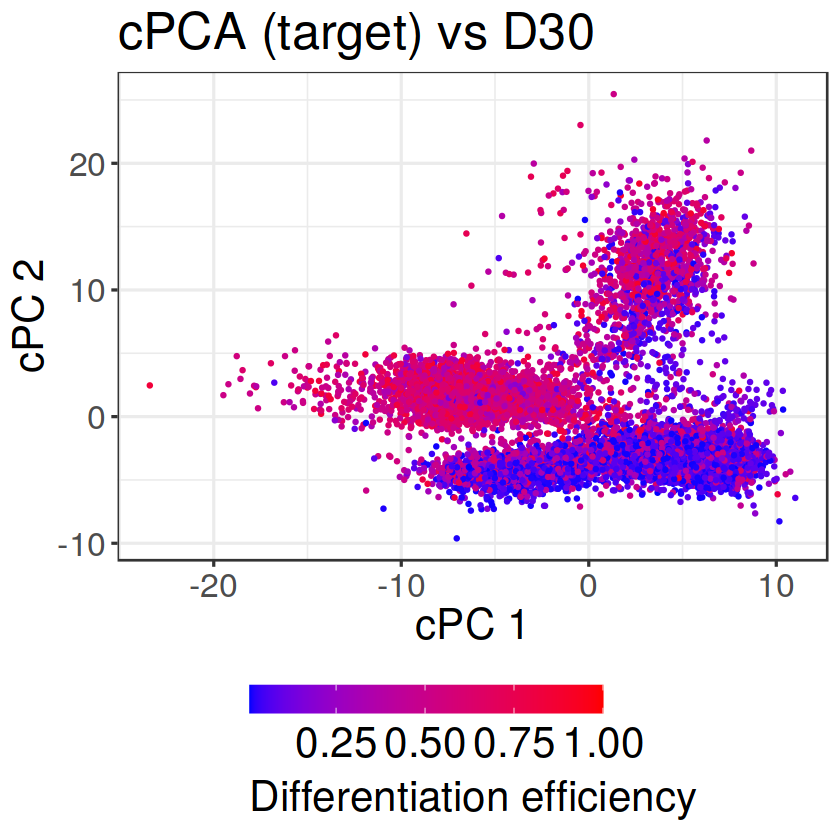

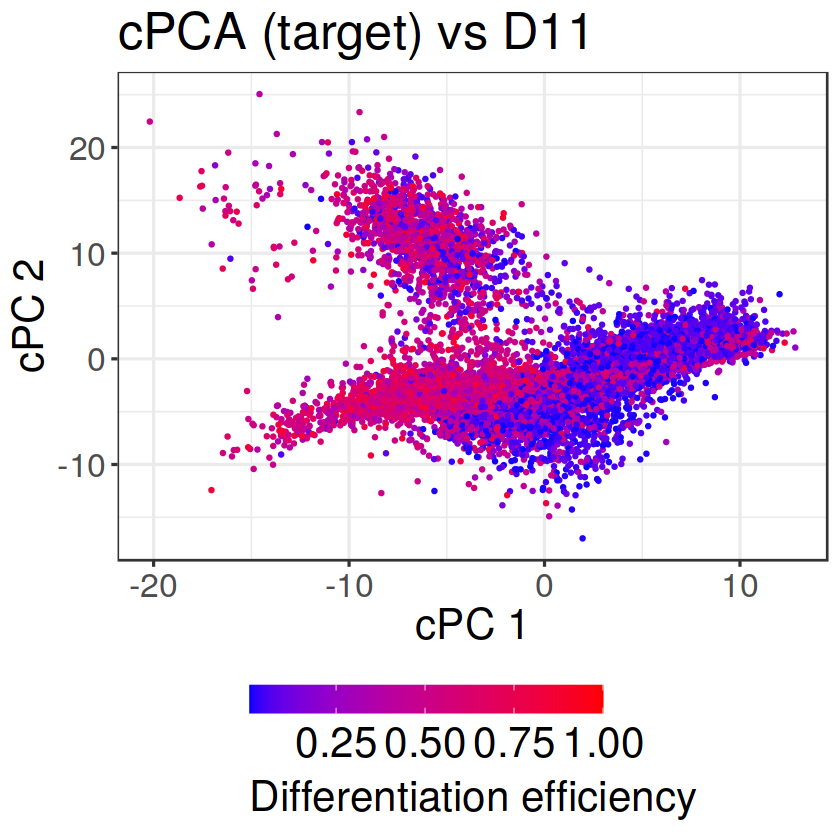

In [3]:
library(ggplot2)
for(b in 1:3){
X_0=target[,intersect(g_target,g_background[[b]])]
X_j=background[[b]][,intersect(g_target,g_background[[b]])]
if(b==1)alphas=c(0,0.8)
if(b!=1)alphas=c(0.8)
  for(alpha in alphas) {
      
        
      
  cov_0=cov(X_0)
  cov_j=cov(X_j)  
      
      
      
    cprc_res=eigen(cov_0-alpha*cov_j)
    cPC=X_0%*%cprc_res$vectors[,1:2]
    cPC=cPC
    lab0=DE
    #cPC=umap(cPC)$layout    
    if(alpha==0){
      
      tmp = data.frame(cPC[,1:2])
      colnames(tmp) = c("X1", "X2")
      p=ggplot(tmp, aes(x = -X1, y = X2))+ labs(color = "Differentiation efficiency")  + ylab("PC 2") +
        xlab("PC 1") + theme_bw(base_size = 15)+ggtitle(paste0("PCA (target)")) +
        geom_point(aes(color = lab0),size=0.5)+
        theme(legend.position = "bottom",legend.text = element_text(size=25),legend.title=element_text(size=25),
              plot.title=element_text(size=30),axis.title=element_text(size=25),
              axis.text=element_text(size=20))+
        scale_color_gradient(low = "blue", high = "red")+
        theme(legend.key.width = unit(1.5, "cm"))+
  guides(color = guide_colorbar(title.position = "bottom")) #+ guides(colour = guide_legend(override.aes = list(size=3)))+ 
      #guides(colour = guide_legend(override.aes = list(size = 5),nrow=2))
      print(p)    
      
      
      cluster=lab0
      set.seed(1)
    }
    if(alpha!=0){
      tmp = data.frame(cPC[,1:2])
      colnames(tmp) = c("X1", "X2")
      p=ggplot(tmp, aes(x = X1, y = X2))+ labs(color = "Differentiation efficiency")  + ylab("cPC 2") +
        xlab("cPC 1") + theme_bw(base_size = 15)+ggtitle(paste0("cPCA (target) vs ",data_name[b])) +
        geom_point(aes(color = lab0),size=0.5)+
        theme(legend.position = "bottom",legend.text = element_text(size=25),legend.title=element_text(size=25),
              plot.title=element_text(size=30),axis.title=element_text(size=25),
              axis.text=element_text(size=20))+
        scale_color_gradient(low = "blue", high = "red")+
        theme(legend.key.width = unit(1.5, "cm"))+
  guides(color = guide_colorbar(title.position = "bottom")) #+ guides(colour = guide_legend(override.aes = list(size=3)))+ 
      print(p)
      
      
      cluster=lab0
      set.seed(1)
      
      
    }    
    
    
  }    
    
    
    
    
}



It turns out that the cPCA with the background D52 (control) or D30 cells provides much clearer separtion by Differential Efficiency (DE) than that with D11, which also is supported by the BasCoD p-values reported below.

# BasCoD results

In [4]:
for(b in 1:3){
print(paste0("Candidate bakcground: ",data_name[b]))
X_0=target[,intersect(g_target,g_background[[b]])]
X_j=background[[b]][,intersect(g_target,g_background[[b]])]
prc_0=prcomp(X_0)
prc_j=prcomp(X_j)
embedding_0=prc_0$x
embedding_j=prc_j$x    
bascod_res=BasCoD_single(X_0=X_0,X_j=X_j,R_0=10,R_j=6,embedding_0=embedding_0,embedding_j = embedding_j,eps=0.3)
    
    
}

[1] "Candidate bakcground: D52 (control)"
[1] "BasCoD p-value is : 1"
[1] "Candidate bakcground: D30"
[1] "BasCoD p-value is : 0.0560947039576445"
[1] "Candidate bakcground: D11"
[1] "BasCoD p-value is : 1.19335331494885e-54"
